## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.531016 -0.840582 -0.691581  0.694111 -0.603446 -0.527907
1 -0.522586 -0.326372 -0.836717 -0.702336 -0.956224 -0.949341
2 -1.049292  0.087909  0.571137 -0.848919 -0.995934 -1.345722
3 -0.308959  1.130768  0.698232 -0.110342 -0.315478  0.357626
4  0.334138  1.675442 -0.805241  0.815306  1.180466  1.626487


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9722303	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9618944	total: 70ms	remaining: 34.9s
2:	learn: 0.9511102	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9403900	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9312755	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9214200	total: 72.4ms	remaining: 12s
6:	learn: 0.9115739	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9031134	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8931620	total: 74ms	remaining: 8.15s
9:	learn: 0.8838726	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8747958	total: 75ms	remaining: 6.74s
11:	learn: 0.8661461	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8570021	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8493515	total: 76.6ms	remaining: 5.39s
14:	learn: 0.8411343	total: 77.1ms	remaining: 5.06s
15:	learn: 0.8332605	total: 77.6ms	remaining: 4.77s
16:	learn: 0.8261360	total: 78ms	remaining: 4.51s
17:	learn: 0.8182734	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8107686	total: 79ms	remaining: 4.08s
19:	

84:	learn: 0.4511004	total: 109ms	remaining: 1.17s
85:	learn: 0.4482480	total: 109ms	remaining: 1.16s
86:	learn: 0.4440353	total: 110ms	remaining: 1.15s
87:	learn: 0.4400238	total: 110ms	remaining: 1.14s
88:	learn: 0.4362711	total: 110ms	remaining: 1.13s
89:	learn: 0.4331760	total: 111ms	remaining: 1.12s
90:	learn: 0.4293978	total: 111ms	remaining: 1.11s
91:	learn: 0.4266526	total: 111ms	remaining: 1.1s
92:	learn: 0.4234399	total: 112ms	remaining: 1.09s
93:	learn: 0.4198105	total: 112ms	remaining: 1.08s
94:	learn: 0.4163357	total: 113ms	remaining: 1.07s
95:	learn: 0.4129851	total: 113ms	remaining: 1.06s
96:	learn: 0.4104353	total: 114ms	remaining: 1.06s
97:	learn: 0.4070142	total: 114ms	remaining: 1.05s
98:	learn: 0.4036881	total: 114ms	remaining: 1.04s
99:	learn: 0.4017037	total: 115ms	remaining: 1.03s
100:	learn: 0.3976459	total: 115ms	remaining: 1.02s
101:	learn: 0.3941186	total: 115ms	remaining: 1.01s
102:	learn: 0.3913794	total: 116ms	remaining: 1.01s
103:	learn: 0.3883371	total: 

252:	learn: 0.1365368	total: 188ms	remaining: 554ms
253:	learn: 0.1356784	total: 188ms	remaining: 554ms
254:	learn: 0.1349553	total: 189ms	remaining: 552ms
255:	learn: 0.1342016	total: 189ms	remaining: 550ms
256:	learn: 0.1333753	total: 190ms	remaining: 549ms
257:	learn: 0.1325975	total: 190ms	remaining: 548ms
258:	learn: 0.1314952	total: 191ms	remaining: 546ms
259:	learn: 0.1306076	total: 192ms	remaining: 545ms
260:	learn: 0.1295352	total: 192ms	remaining: 544ms
261:	learn: 0.1286554	total: 193ms	remaining: 542ms
262:	learn: 0.1278230	total: 193ms	remaining: 541ms
263:	learn: 0.1271563	total: 194ms	remaining: 540ms
264:	learn: 0.1263646	total: 194ms	remaining: 538ms
265:	learn: 0.1254284	total: 195ms	remaining: 537ms
266:	learn: 0.1246337	total: 195ms	remaining: 536ms
267:	learn: 0.1237689	total: 196ms	remaining: 534ms
268:	learn: 0.1230663	total: 196ms	remaining: 533ms
269:	learn: 0.1223762	total: 197ms	remaining: 532ms
270:	learn: 0.1214344	total: 197ms	remaining: 530ms
271:	learn: 

472:	learn: 0.0432607	total: 293ms	remaining: 326ms
473:	learn: 0.0432080	total: 293ms	remaining: 326ms
474:	learn: 0.0429320	total: 294ms	remaining: 325ms
475:	learn: 0.0428878	total: 294ms	remaining: 324ms
476:	learn: 0.0426761	total: 295ms	remaining: 323ms
477:	learn: 0.0426250	total: 295ms	remaining: 322ms
478:	learn: 0.0424028	total: 296ms	remaining: 321ms
479:	learn: 0.0423528	total: 296ms	remaining: 321ms
480:	learn: 0.0423034	total: 296ms	remaining: 320ms
481:	learn: 0.0421145	total: 297ms	remaining: 319ms
482:	learn: 0.0419273	total: 297ms	remaining: 318ms
483:	learn: 0.0418847	total: 299ms	remaining: 318ms
484:	learn: 0.0416939	total: 299ms	remaining: 318ms
485:	learn: 0.0416518	total: 300ms	remaining: 317ms
486:	learn: 0.0414680	total: 300ms	remaining: 316ms
487:	learn: 0.0412900	total: 301ms	remaining: 315ms
488:	learn: 0.0412485	total: 301ms	remaining: 314ms
489:	learn: 0.0410307	total: 301ms	remaining: 314ms
490:	learn: 0.0409899	total: 302ms	remaining: 313ms
491:	learn: 

639:	learn: 0.0258814	total: 372ms	remaining: 209ms
640:	learn: 0.0257613	total: 373ms	remaining: 209ms
641:	learn: 0.0257277	total: 373ms	remaining: 208ms
642:	learn: 0.0256200	total: 374ms	remaining: 208ms
643:	learn: 0.0255131	total: 374ms	remaining: 207ms
644:	learn: 0.0254804	total: 375ms	remaining: 206ms
645:	learn: 0.0253340	total: 375ms	remaining: 206ms
646:	learn: 0.0253019	total: 376ms	remaining: 205ms
647:	learn: 0.0252655	total: 376ms	remaining: 204ms
648:	learn: 0.0251214	total: 376ms	remaining: 204ms
649:	learn: 0.0250901	total: 377ms	remaining: 203ms
650:	learn: 0.0250546	total: 377ms	remaining: 202ms
651:	learn: 0.0249128	total: 378ms	remaining: 202ms
652:	learn: 0.0247951	total: 378ms	remaining: 201ms
653:	learn: 0.0247648	total: 378ms	remaining: 200ms
654:	learn: 0.0246434	total: 379ms	remaining: 200ms
655:	learn: 0.0245362	total: 380ms	remaining: 199ms
656:	learn: 0.0245066	total: 380ms	remaining: 198ms
657:	learn: 0.0244051	total: 380ms	remaining: 198ms
658:	learn: 

859:	learn: 0.0116960	total: 477ms	remaining: 77.6ms
860:	learn: 0.0116312	total: 477ms	remaining: 77ms
861:	learn: 0.0115679	total: 478ms	remaining: 76.5ms
862:	learn: 0.0115083	total: 479ms	remaining: 76ms
863:	learn: 0.0114667	total: 479ms	remaining: 75.5ms
864:	learn: 0.0114437	total: 480ms	remaining: 74.9ms
865:	learn: 0.0113955	total: 480ms	remaining: 74.3ms
866:	learn: 0.0113717	total: 481ms	remaining: 73.7ms
867:	learn: 0.0113332	total: 481ms	remaining: 73.2ms
868:	learn: 0.0113102	total: 482ms	remaining: 72.6ms
869:	learn: 0.0112892	total: 482ms	remaining: 72ms
870:	learn: 0.0112425	total: 482ms	remaining: 71.5ms
871:	learn: 0.0112207	total: 483ms	remaining: 70.9ms
872:	learn: 0.0111901	total: 483ms	remaining: 70.3ms
873:	learn: 0.0111690	total: 484ms	remaining: 69.8ms
874:	learn: 0.0111417	total: 484ms	remaining: 69.2ms
875:	learn: 0.0111103	total: 485ms	remaining: 68.6ms
876:	learn: 0.0111019	total: 485ms	remaining: 68ms
877:	learn: 0.0110936	total: 486ms	remaining: 67.5ms
8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

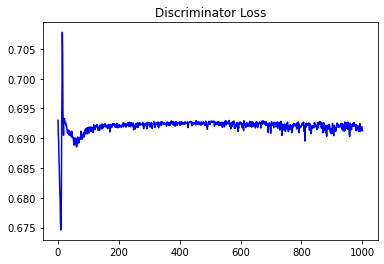

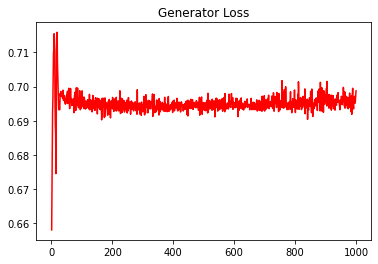

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03916406860152826


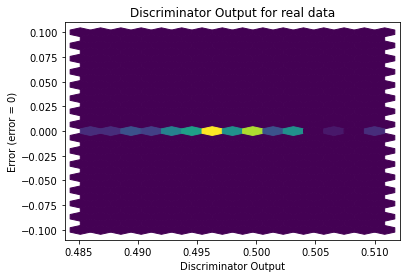

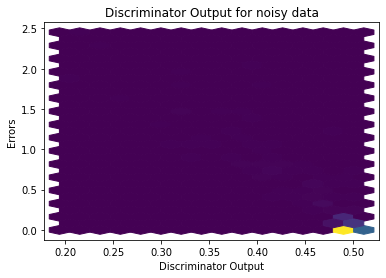

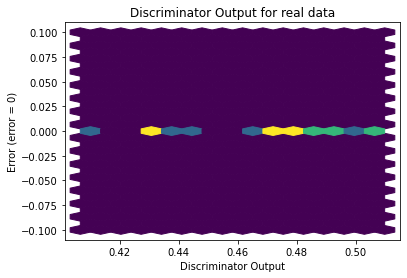

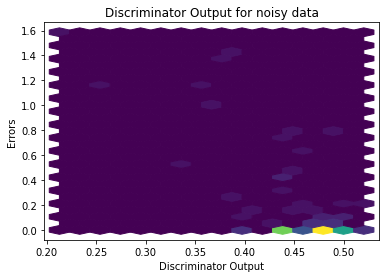

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


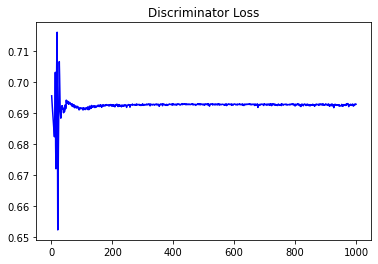

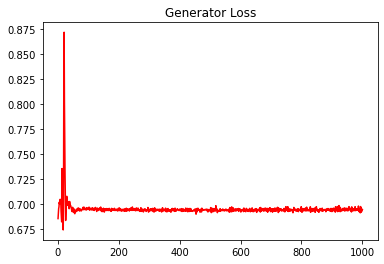

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03052473468063014


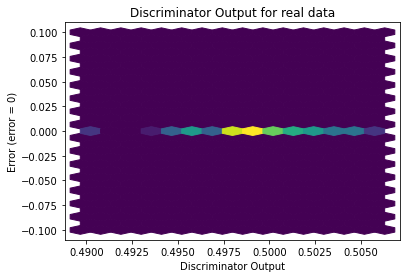

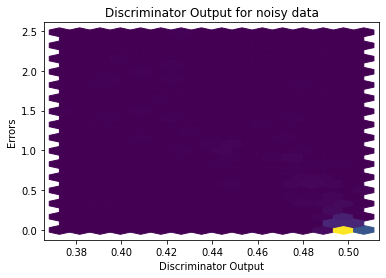

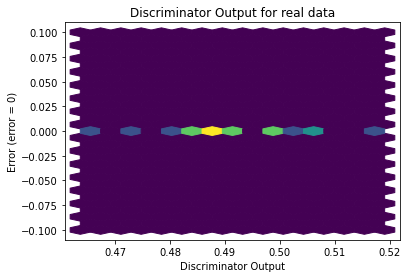

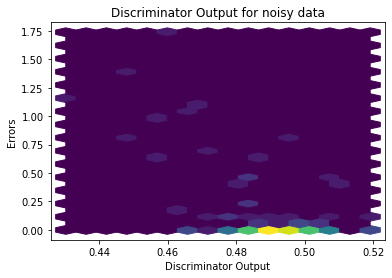

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7343]], requires_grad=True)
